In [1]:
import pandas as pd

#import csv file
from google.colab import files
uploaded = files.upload()
file_name= list(uploaded.keys())[0]
data = pd.read_csv(file_name)
print(data)

Saving 6_descision_tree.csv to 6_descision_tree.csv
    No     Income     Age Own house
0    1  Very high   Young       Yes
1    2       High  Medium       Yes
2    3        Low   Young    Rented
3    4       High  Medium       Yes
4    5  Very high  Medium       Yes
5    6     Medium   Young       Yes
6    7       High     Old       Yes
7    8     Medium  Medium    Rented
8    9        Low  Medium    Rented
9   10        Low     Old    Rented
10  11       High   Young       Yes
11  12     Medium     Old    Rented


In [2]:
import math

def entropy(data):
    """Calculates the entropy of a dataset."""
    labels = data.iloc[:, -1].tolist()  # Assuming the last column is the target variable
    unique_labels = set(labels)
    entropy_value = 0
    for label in unique_labels:
        prob = labels.count(label) / len(labels)
        entropy_value -= prob * math.log2(prob)
    return entropy_value

def information_gain(data, feature):
    """Calculates the information gain of a feature."""
    total_entropy = entropy(data)
    unique_values = set(data[feature].tolist())
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)
    return total_entropy - weighted_entropy

def best_split(data):
    """Finds the best feature to split the data on."""
    best_feature = None
    max_gain = 0
    for feature in data.columns[:-1]:  # Exclude the target variable
        gain = information_gain(data, feature)
        if gain > max_gain:
            max_gain = gain
            best_feature = feature
    return best_feature

def build_tree(data):
    """Builds the decision tree recursively."""
    labels = data.iloc[:, -1].tolist()
    if len(set(labels)) == 1:  # All instances have the same label
        return labels[0]
    if len(data.columns) == 1:  # No more features to split on
        return max(set(labels), key=labels.count)  # Return the majority label
    best_feature = best_split(data)
    tree = {best_feature: {}}
    for value in set(data[best_feature].tolist()):
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = build_tree(subset)
    return tree

def predict(tree, instance):
    """Predicts the class label for a given instance."""
    if not isinstance(tree, dict):  # Reached a leaf node
        return tree
    feature = list(tree.keys())[0]
    value = instance[feature]
    if value in tree[feature]:
        return predict(tree[feature][value], instance)
    else:
        # Handle missing values or unseen values during prediction
        # You might return the majority class or a default value here
        return None  # Or any appropriate handling strategy

# Build the decision tree
decision_tree = build_tree(data)

In [3]:
from scipy.stats import mode

In [4]:
def predict(tree, instance):
    """Predicts the class label for a given instance."""
    if not isinstance(tree, dict):  # Reached a leaf node
        return tree
    feature = list(tree.keys())[0]
    value = instance[feature]
    if value in tree[feature]:
        return predict(tree[feature][value], instance)
    else:
        # Handle missing values or unseen values during prediction
        # Return the most frequent class in the training data (or any appropriate handling strategy)
        # Assuming 'data' is accessible and contains the training data
        most_frequent_class = data.iloc[:, -1].mode()[0]  # Get the most frequent class from the target variable column
        return most_frequent_class

In [5]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder

# ... (your code to load and preprocess the data) ...

# Split the data into training and testing sets
X = data.drop(columns=[data.columns[-1]])  # Features
y = data.iloc[:, -1]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an OrdinalEncoder to convert categorical features to numerical
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# handle_unknown='use_encoded_value' and unknown_value=-1 will assign -1 to unseen values

# Fit the encoder on the training data and transform both training and testing data
X_train = encoder.fit_transform(X_train) # Fit and transform the training data
X_test = encoder.transform(X_test) # Transform the testing data

# Continue with your decision tree training and plotting
# ...


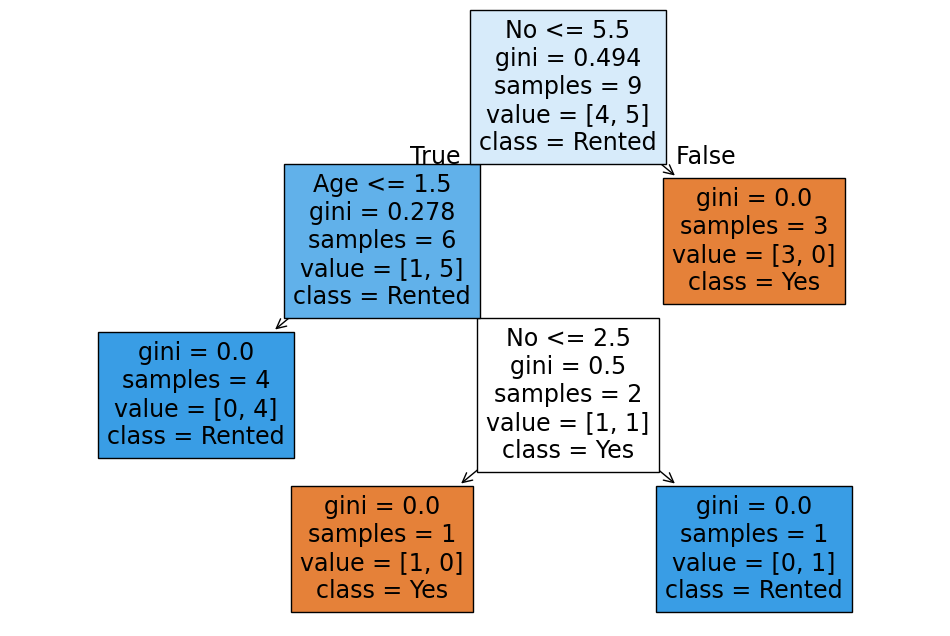

In [6]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder

# ... (your code to load and preprocess the data) ...

# Split the data into training and testing sets
X = data.drop(columns=[data.columns[-1]])  # Features
y = data.iloc[:, -1]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an OrdinalEncoder to convert categorical features to numerical
# handle_unknown='use_encoded_value' and unknown_value=-1 will assign -1 to unseen values during the transform step
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the training data and transform both training and testing data
X_train = encoder.fit_transform(X_train) # Fit and transform the training data
X_test = encoder.transform(X_test) # Transform the testing data

# Create and train the decision tree classifier
decision_tree = DecisionTreeClassifier()  # Use scikit-learn's classifier
decision_tree.fit(X_train, y_train)

# Plot the decision tree
class_names = ['Yes', 'Rented']  # Replace with your actual class names
plt.figure(figsize=(12, 8))
feature_names = encoder.feature_names_in_ if hasattr(encoder, 'feature_names_in_') else X.columns[:-1]
plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()
decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)